In [146]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
from sklearn import metrics, cluster, datasets
from sklearn import decomposition
from sklearn import manifold
import warnings
warnings.filterwarnings('ignore')

In [176]:
data = datasets.load_digits()
X,y= data.data, data.target

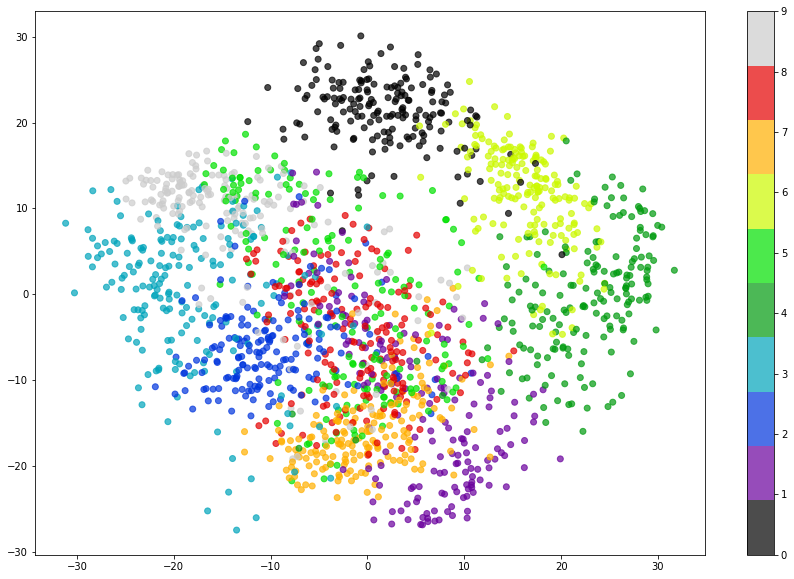

In [162]:

pca = decomposition.PCA(n_components=2)
pca = pca.fit_transform(X)

df= pd.DataFrame(pca,columns=['comp1','comp2']).join(pd.DataFrame(y,columns=['labels']))


plt.figure(figsize= (15,10))
plt.scatter(df['comp1'],df['comp2'],c=y, alpha=0.7,cmap=plt.get_cmap('nipy_spectral',10))
plt.colorbar()

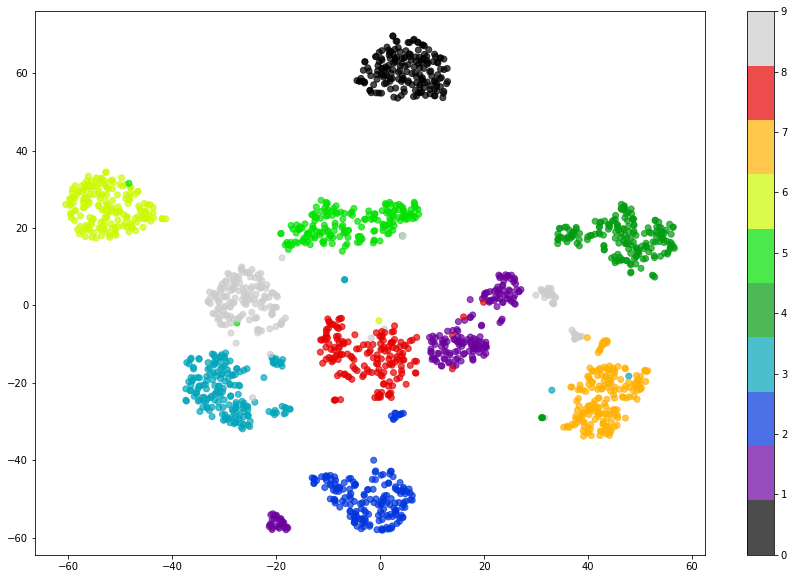

In [167]:
tsne = manifold.TSNE(random_state=17)
tsne = tsne.fit_transform(X)

df= pd.DataFrame(tsne,columns=['comp1','comp2']).join(pd.DataFrame(y,columns=['labels']))

plt.figure(figsize= (15,10))
plt.scatter(df['comp1'],df['comp2'],c=y, alpha=0.7,cmap=plt.get_cmap('nipy_spectral',10))
plt.colorbar()

In [142]:
algorithms = []
algorithms.append(cluster.KMeans(n_clusters=10, random_state= 1))
algorithms.append(cluster.AffinityPropagation())
algorithms.append(cluster.SpectralClustering(n_clusters= 10,random_state=1,affinity='nearest_neighbors'))
algorithms.append(cluster.AgglomerativeClustering(n_clusters=10))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append({
     'ARI': metrics.adjusted_rand_score(y,algo.labels_),
     'AMI':metrics.adjusted_mutual_info_score(y,algo.labels_),
     'Silhouette':metrics.silhouette_score(X, algo.labels_)
    })

result =  pd.DataFrame(data=data, index= ['Kmeans','Affinity Popagation','Spectral Clustering', 'Agglomerative Clustering' ])

In [129]:
result.sort_values(by =['Silhouette'], ascending= False)

,ARI,AMI,Silhouette
Kmeans,0.388238,0.521527,0.392229
Spectral Clustering,0.360750,0.518475,0.377182
Agglomerative Clustering,0.342762,0.497240,0.352536
Affinity Popagation,0.216709,0.470176,0.327779
